### Desafío - Naive Bayes

* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección correspondiente.

Nombres: - María Eugenia Martínez - Rene Navarro - Juan Oyarce  

### Descripción

* En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. 
* Cada uno de los csv se encuentra en la carpeta dump dentro del proyecto. Cada csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras.
* En base a esta información, se les pide un modelo generativo que pueda predecir el género de una canción a patir de la letra de una canción.
* Existen 4 géneros que se registran en la base de datos, por lo que para esta actividad trabajaremos con un Multinomial Naive Bayes.

### Ejercicio 1: Preparar el ambiente de trabajo

* Importe los módulos numpy , pandas , matplotlib , seaborn , glob y os siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta dump.
* Para ello genere un objeto que guarde en una lista todos los archivos alojados en dump utilizando glob.glob y os.getcwd() para extraer las rutas absolutas. Posteriormente genere un objeto pd.DataFrame que contenga todos los csv.
* Asegúrese de eliminar la columna Unnamed: 0 que se genera por defecto.

In [91]:
# Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from IPython.display import display, Markdown
import missingno as msngo

import os
import glob
import operator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline



import warnings
warnings.filterwarnings('ignore')

In [159]:
#creación de un dataframe con los csv separados
direction= glob.glob(os.getcwd()+'\dump\*.csv') # dirección de los archivos csv
dfList=[]
for filename in direction: # ciclo para añadir los csv a una lista de csv
    print(filename)
    df=pd.read_csv(filename, header=None)
    dfList.append(df) 
    

C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump\anthrax_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump\a_tribe_called_quest_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump\black_star_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump\bob_dylan_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump\britney_spears_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump\bruce_springsteen_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump\cannibal_corpse_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump\carly_rae_jepsen_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump\deicide_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump\de_la_soul_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump\dr._dre_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump\dua_lipa_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump\eminem_scrape.csv
C:\Users\Juan\Desafio\Modulo III\De

In [168]:
concatDf=pd.concat(dfList, axis=0) #concatenacion de  la lista de csv a un dataframe
display(concatDf.shape)
namescol=["a", "grupo","genero","cancion","letra"]# nombre a las columnas del dataframe
concatDf.columns=namescol
concatDf.drop(concatDf.columns[0], axis='columns', inplace= True) #Eliminación primera "columna basura"
df=concatDf
display (df.shape)
df = df.drop(df[df['grupo']=='0'].index) #Eliminación de las falsas filas que se generan al concatenar los múltiples csv
display(df.shape)

(9551, 5)

(9551, 4)

(9489, 4)

In [347]:
df.head()

,grupo,genero,cancion,letra
1,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
2,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
3,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
4,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
5,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...


### Ejercicio 2: Descripción de los datos
* Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman la siguiente información:
    * La cantidad de canciones registradas por cada artista, ordenado de mayor a menor.
    * La cantidad de canciones registradas en cada género, ordenados de mayor a menor.
* Comente sobre las principales tendencias.

In [11]:
display (df["grupo"].value_counts())
display (df["genero"].value_counts())

Eminem                      493
Bruce Springsteen           467
Bob Dylan                   447
Britney Spears              323
Nicki Minaj                 282
Michael Jackson             279
Kanye West                  273
The Beatles                 265
Ghostface Killah            255
The Smashing Pumpkins       254
Weezer                      251
Mobb Deep                   231
Red Hot Chili Peppers       226
Kiss                        219
The Doors                   214
Public Enemy                198
Megadeth                    190
Queen                       188
Iron Maiden                 185
Raekwon                     184
De La Soul                  174
Cannibal Corpse             171
Anthrax                     170
Rush                        167
Metallica                   155
Modest Mouse                154
Radiohead                   151
Slayer                      147
The Clash                   145
Pink Floyd                  135
                           ... 
Kendrick

rock      4140
hiphop    2535
metal     1582
pop       1232
Name: genero, dtype: int64

Text(0, 0.5, 'Grupos')

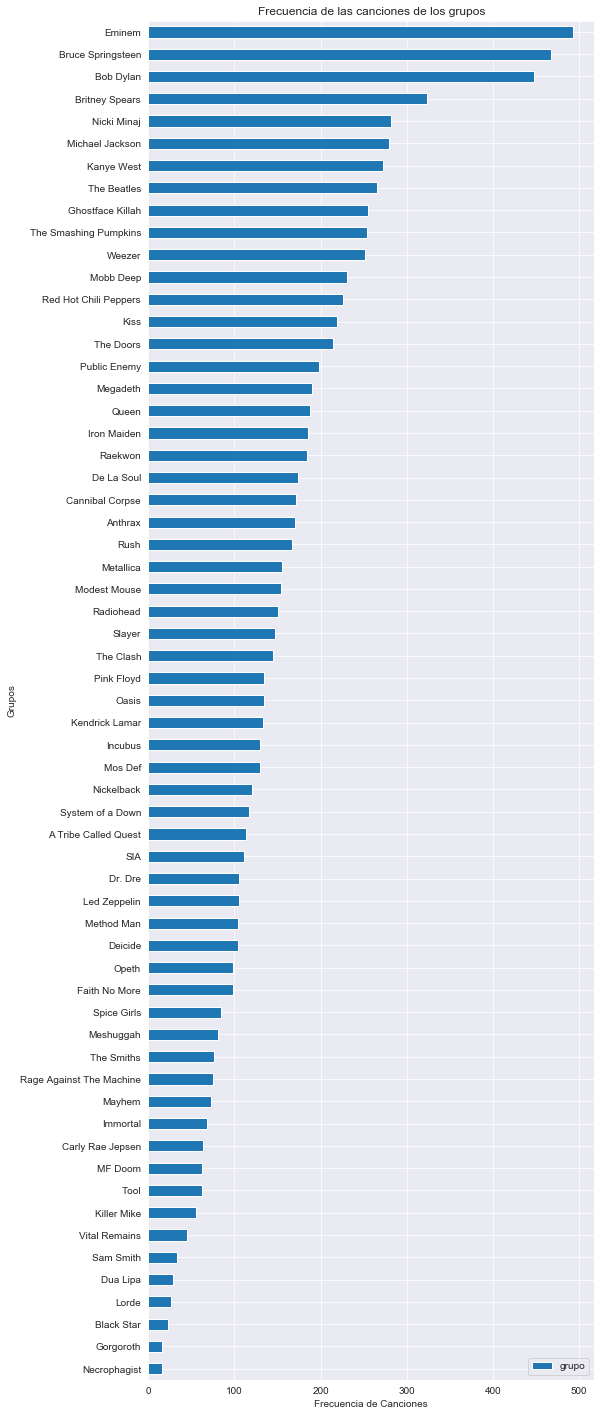

In [12]:
plt.figure(figsize=(8, 25))
df["grupo"].value_counts().sort_values().plot(kind='barh', legend='reverse')
plt.title('Frecuencia de las canciones de los grupos')
plt.xlabel('Frecuencia de Canciones')
plt.ylabel('Grupos')

Text(0, 0.5, 'Genero')

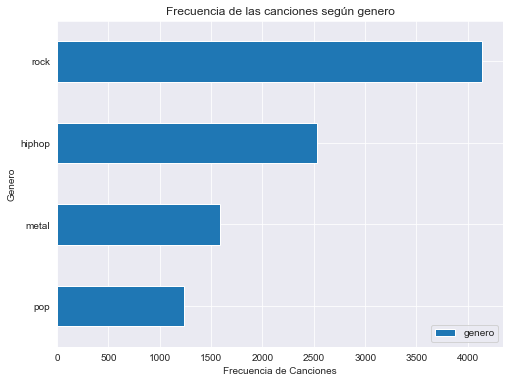

In [13]:
plt.figure(figsize=(8, 6))
df["genero"].value_counts().sort_values().plot(kind='barh', legend='reverse')
plt.title('Frecuencia de las canciones según genero')
plt.xlabel('Frecuencia de Canciones')
plt.ylabel('Genero')

- Se puede apreciar que los grupos que tienen mayor cantidad de canciones corresponden a Eminen, Bruce Springteen, Bob Dylan, entre otros; el rango varía desde Eminen con 493 canciones hasta Necrophagist con sólo 16 canciones . Con respecto, a los generos más representados, predomina el rock con 4140 canciones, seguido por el hip-hop con 2535, luego el metal con  1582 y, por último, el pop con 1232 canciones.

### Ejercicio 3: Matriz de ocurrencias

* Digresión: Tokenización de Textos
    * Para poder trabajar con textos, debemos pasarlos a una matriz dispersa, donde cada fila representará una entrada (en este caso, una canción), y cada columna representará una palabra (token). Este es el proceso de tokenización: Identificar la ocurrencia de una palabra específica dentro de un conjunto de textos (corpus). El tokenizador más simple sklearn.feature_extraction.text.CountVectorizer genera una colección de textos a una matriz que representa la frecuencia dentro del texto de una palabra específica. El tokenizador funciona de la siguiente manera:
    
```python

from sklearn.feature_extraction.text import CountVectorizer
# instanciamos un objeto
count_vectorizer=CountVectorizer(stop_words='english')
# Implementamos los pasos fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(lista_de_textos)
# Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()
# extraemos frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=0)
```
    
    
* Importe la clase CountVectorizer dentro de los módulos feature_extraction.text de la librería sklearn . Lea la documentación asociada a ésta. ¿Cuál es el objetivo de esta clase?
* Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos.
* Genere una función que replique el procedimiento para cada uno de los géneros.
* Comente sobre las principales características de cada género en cuanto a sus palabras.

In [15]:
# Conteo de palabras  generales
# 1 Instanciamos un objeto CountVectorizer
count_vectorizer=CountVectorizer(stop_words='english',max_features=100)
# 2 Implementamos los pasos fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(df['letra'])
# 3 Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()
# 4 Extraemos frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=0)
# 5 Generamos un diccionario con ambos array: palabras y su frecuencia
words_freq_show = dict(zip(words, words_freq)) 
# 6 Ordenamos el diccionario de acuerdo a los valores con el método operator.itemgetter
words_sortedfreq=sorted(words_freq_show.items(),key=operator.itemgetter(1,0))
print(words)
print (words_sortedfreq)

['ah', 'ain', 'ass', 'away', 'baby', 'bad', 'better', 'big', 'bitch', 'black', 'boy', 'cause', 'come', 'day', 'dead', 'death', 'did', 'die', 'don', 'em', 'end', 'everybody', 'eyes', 'face', 'feel', 'fuck', 'girl', 'god', 'gone', 'gonna', 'good', 'got', 'gotta', 'hard', 'head', 'hear', 'heart', 'hey', 'high', 'hit', 'hold', 'home', 'inside', 'just', 'know', 'la', 'leave', 'left', 'let', 'life', 'light', 'like', 'little', 'live', 'll', 'long', 'look', 'love', 'make', 'man', 'mind', 'money', 'need', 'new', 'nigga', 'niggas', 'night', 'oh', 'ooh', 'people', 'real', 'really', 'right', 'rock', 'run', 'said', 'say', 'shit', 'soul', 'stay', 'stop', 'tell', 'thing', 'things', 'think', 'till', 'time', 'tonight', 'try', 'turn', 'uh', 've', 'wanna', 'want', 'way', 'won', 'world', 'ya', 'yeah', 'yo']
[('stay', 1828), ('end', 1829), ('thing', 1882), ('left', 1895), ('death', 1897), ('everybody', 1903), ('inside', 1915), ('soul', 1921), ('boy', 1971), ('high', 1989), ('till', 2003), ('tonight', 2010)

In [350]:
# Función para contar palabras según el genero
def words_genrer (genero, nwords=10):
    """
    Definición:Está función cuenta las pabras más frecuentes según la letra del genero de la canción
    Input: recibe un string con el nombre del genero en el datafreme y un paramétro numérico que es 
    nwords que son el número de palabras a contar, por default son 10.
    Outpout:Imprime una lista con las palabras y una lista con los diccionarios de la palabra y su 
    frecuencia ordenada ascendentemente
    """
    count_vectorizer=CountVectorizer(stop_words='english',max_features=nwords)
    count_vectorizer_fit = count_vectorizer.fit_transform(df[(df['genero'] == genero)]['letra'])
    words = count_vectorizer.get_feature_names()
    words_freq = count_vectorizer_fit.toarray().sum(axis=0)
    words_freq_show = dict(zip(words, words_freq)) 
    words_sortedfreq=sorted(words_freq_show.items(),key=operator.itemgetter(1,0))
    print('Las ',nwords,' principales palabras del genero son: \n', words )
    print("---------------------------------\n")
    print('la frecuencia ordenada de éstas palabras es: \n',words_sortedfreq)

In [351]:
words_genrer('rock')

Las  10  principales palabras del genero son: 
 ['don', 'got', 'just', 'know', 'like', 'll', 'love', 'oh', 've', 'yeah']
---------------------------------

la frecuencia ordenada de éstas palabras es: 
 [('ve', 2877), ('like', 3710), ('ll', 3825), ('got', 3872), ('just', 4103), ('yeah', 4157), ('oh', 4258), ('know', 4702), ('love', 5114), ('don', 5284)]


In [18]:
words_genrer('hiphop')

Las  10  principales palabras del genero son: 
 ['ain', 'cause', 'don', 'got', 'just', 'know', 'like', 'man', 'shit', 'yo']
---------------------------------

la frecuencia ordenada de éstas palabras es: 
 [('yo', 4425), ('man', 4481), ('cause', 4737), ('ain', 4782), ('shit', 5546), ('just', 6272), ('know', 6535), ('don', 7604), ('got', 7613), ('like', 12055)]


In [19]:
words_genrer('metal')

Las  10  principales palabras del genero son: 
 ['blood', 'death', 'die', 'don', 'just', 'know', 'life', 'like', 'll', 'time']
---------------------------------

la frecuencia ordenada de éstas palabras es: 
 [('die', 866), ('like', 869), ('blood', 884), ('just', 993), ('know', 1048), ('ll', 1069), ('time', 1096), ('death', 1139), ('don', 1181), ('life', 1233)]


In [20]:
words_genrer('pop')

Las  10  principales palabras del genero son: 
 ['baby', 'don', 'got', 'just', 'know', 'like', 'll', 'love', 'oh', 'yeah']
---------------------------------

la frecuencia ordenada de éstas palabras es: 
 [('ll', 1743), ('got', 2156), ('baby', 2192), ('yeah', 2244), ('just', 2610), ('know', 2677), ('oh', 2737), ('love', 2914), ('like', 2995), ('don', 3329)]


- La clase CountVectorizer permite tokenizar un string y contar el número de tokens existentes.


- Se puede apreciar que hay muchas palabras que se repiten entre sí, y también algunas constracciones, si bien la función stop_words permite ignorar éstas expresiones del lenguaje, para un mejor análisis se deberá realizar un preprocesamiento que incluya éste tipo de contracciones como por ejemplo 'll' +'ve', que en estricto rigor conforman una palabra. Pero se puede observar que, en términos generales, en el rock predominan la "negación" (dont), el amor, el gustar, y expresiones como "yeah" y "oh". En el hip-hop predomina el gustar (like), hombre, yo, sé, la negación, mierda, ésto da cuenta del contenido de las letras del genero.  En el metal también se observa la negación, pero sumado a palabras como muerte, sangre, vida, tiempo, morir, entre otros. En el pop predomina, el amor, la negación, el se, el gustar, baby y expresiones como "yeah" y "oh".

### Ejercicio 4: Entrenamiento del Modelo
* Digresión: sklearn Pipelines
    * La clase Pipeline del módulo sklearn.pipeline permite concatenar múltiples pasos de procesamiento y preprocesamiento en un estimador generado por algún método de scikitlearn . En sí, la clase cuenta con los métodos clásicos fit , predict y score y presenta un comportamiento idéntico a los demás objetos de scikit-learn . Uno de los usos más comunes es para concatenar pasos de preprocesamiento con un modelo.
    
* Componentes de un Pipeline
   * Imaginemos que deseamos implementar el siguiente modelo. Considerando un conjunto de datos, deseo Estandarlizarlo, posteriormente extraer sus principales componentes y finalmente aplicar un modelo de regresión lineal. Este flujo se puede reexpresar como:
       
```python
pipeline_model = Pipeline([('scale', StandardScaler()),
                            ('pca', RandomizedPCA(n_components=3)),
                            ('model', LinearRegression())])
```
Algunos de los elementos a considerar:
1. Cada paso se considera como una tupla, donde se declara el nombre del paso y la función
a implementar. En este caso, nuestro primer paso es estandarizar la matriz, por lo que
asociamos el método StandardScaler con el string scale .
2. Todos los pasos declarados se incorporan en una lista, donde el orden de ingreso
representa el orden de ejecución.
Posteriormente el objeto creado puede utilizarse con los siguientes métodos

```python
pipeline_model.fit(X_train, y_train)
y_hat = pipeline_model.predict(y_test)
```

* Importe MultinomialNB , train_test_split , Pipeline , confusion_matrix y classification_report.
* Genere las muestras de entrenamiento y validación reservando un 40% para validación y declarando una semilla pseudoaleatoria.
* Monte el modelo dentro de un Pipeline , donde el primer paso es implementar CountVectorizer y el segundo sea ejecutar el clasificador MultinomialNB.
* A continuación se les presenta una lista de letras, ¿cuáles serían las predicciones correspondientes?

```python
['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris -Move B*tch
'Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates' # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving" #Banks -Drowning
]
```

* Genere una predicción implementando la muestra de validación y contraste las predicciones del modelo con las etiquetas verdaderas. Reporte las principales métricas.

In [193]:
# División del dataset en subcojuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(df['letra'], df['genero'], random_state=1986, test_size=.33)






In [264]:
#Procesamiento con Pipelines

pipeline_model = Pipeline([('Vectorización', CountVectorizer(stop_words='english')),
                            ('NaiveBayes', MultinomialNB(alpha=0.1))])
pipeline_model.fit(X_train, y_train)
y_hat = pipeline_model.predict(X_test)

              precision    recall  f1-score   support

      hiphop       0.82      0.92      0.87       767
       metal       0.78      0.76      0.77       467
         pop       0.66      0.65      0.66       742
        rock       0.77      0.72      0.75      1266

   micro avg       0.76      0.76      0.76      3242
   macro avg       0.76      0.76      0.76      3242
weighted avg       0.76      0.76      0.76      3242



None

Text(92.68, 0.5, 'predicted label')

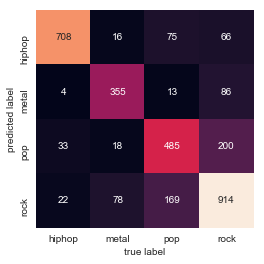

In [265]:
#Metricas de desempeño del modelo

display(print(classification_report(y_test, y_hat)))
generos=['hiphop','metal','pop','rock']
mat = confusion_matrix(y_test, y_hat)
sns.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=generos, 
    yticklabels=generos
)
plt.xlabel('true label')
plt.ylabel('predicted label') 


In [201]:
# Predicción de letras nuevas
letras_val=['I got a place in the underworld', 
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', 
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", 
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', 
'Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates', 
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving" 
]
pipeline_model.predict(letras_val)

array(['rock', 'metal', 'rock', 'pop', 'metal', 'rock'], dtype='<U6')

In [200]:
# Clasificación real de las letras (rock,metal,pop,hiphop,rock,pop)

- Se aprecia que el modelo tiene un nivel de precisión bastante aceptable y una buena sensibilidad, especialmente para los géneros hip-hop, metal y rock, en menor medida disminuye el rendimiento de las clasificaciones del pop, pensamos que ésto se debe a que el data set correspondiente al pop contenía menor número de canciones.


- Al clasificar las nuevas letras y comparar con la clasificación verdadera, vemos que el modelo presenta una precisión del 33 %, es decir clasificó bien 2 canciones de 6, equivalentes al rock y al metal. Si bien, esta muestra es muy pequeña, al aumentar deberían mejorar las puntuaciones, pero para mejorar el modelo se implementarán modificaciones.

### Ejercicio 5: Mejora del Modelo
* Proponga una estrategia para mejorar el desempeño del modelo en la categoría con peores métricas.
* Repita los pasos de entrenamiento y reporte de métricas, esta vez incluyendo los nuevos datos suministrados.
* Comente sobre el desempeño general de éste.

#### * La estrategia para mejorar las métricas de clasificación en Pop, Metal y en general, consistirá en aumentar el data set, modificar los hiperparametros del modelo y probar con un modelo cuya vectorización se realice con los métodos TfidfTransformer y TfidfVectorizer, en lugar de CountVectorizer


### * Modelo I: CountVectorizer

In [178]:
#creación de un dataframe con los csv separados
direction2= glob.glob(os.getcwd()+'\dump_plus_pop\*.csv') # dirección de los archivos csv
dfList_2=[]
for filename in direction2: # ciclo para añadir los csv a una lista de csv
    print(filename)
    df2=pd.read_csv(filename, header=None)
    dfList_2.append(df2) 

C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump_plus_pop\anthrax_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump_plus_pop\ariana_grande_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump_plus_pop\a_tribe_called_quest_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump_plus_pop\backstreet_boys_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump_plus_pop\black_star_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump_plus_pop\bob_dylan_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump_plus_pop\britney_spears_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump_plus_pop\bruce_springsteen_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump_plus_pop\cannibal_corpse_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump_plus_pop\carly_rae_jepsen_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump_plus_pop\christina_aguilera_scrape.csv
C:\Users\Juan\Desafio\Modulo III\Desafíos\1.3\dump_plu

In [352]:
concatDf2=pd.concat(dfList_2, axis=0) #concatenacion de  la lista de csv a un dataframe
display(concatDf2.shape)
namescol=["a", "grupo","genero","cancion","letra"]# nombre a las columnas del dataframe
concatDf2.columns=namescol
concatDf2.drop(concatDf2.columns[0], axis='columns', inplace= True) #Eliminación primera "columna basura"
df2=concatDf2
display (df2.shape)
df2 = df2.drop(df2[df2['grupo']=='0'].index) #Eliminación de las falsas filas que se generan al concatenar los múltiples csv
display(df2.shape)

(10877, 5)

(10877, 4)

(10804, 4)

In [359]:
# División del dataset en subcojuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(df2['letra'], df2['genero'], random_state=1986, test_size=.33)

In [364]:
#Procesamiento con Pipelines

pipeline_model = Pipeline([('Vectorización', CountVectorizer(stop_words='english')),
                            ('NaiveBayes', MultinomialNB(alpha=0.8))])
pipeline_model.fit(X_train, y_train)
y_hat = pipeline_model.predict(X_test)

              precision    recall  f1-score   support

      hiphop       0.84      0.91      0.87       836
       metal       0.82      0.73      0.77       515
         pop       0.64      0.68      0.66       814
        rock       0.78      0.74      0.76      1401

   micro avg       0.77      0.77      0.77      3566
   macro avg       0.77      0.77      0.77      3566
weighted avg       0.77      0.77      0.76      3566



None

Text(92.68, 0.5, 'predicted label')

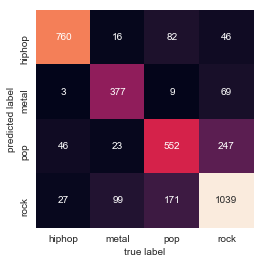

In [365]:
#Metricas de desempeño del modelo

display(print(classification_report(y_test, y_hat)))
generos=['hiphop','metal','pop','rock']
mat = confusion_matrix(y_test, y_hat)
sns.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=generos, 
    yticklabels=generos
)
plt.xlabel('true label')
plt.ylabel('predicted label') 

In [367]:
# Predicción de letras nuevas
letras_val=['I got a place in the underworld', 
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', 
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", 
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', 
'Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates', 
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving" 
]
pipeline_model.predict(letras_val)

array(['rock', 'metal', 'pop', 'pop', 'metal', 'pop'], dtype='<U6')

In [ ]:
# Clasificación real de las letras (rock,metal,pop,hiphop,rock,pop)

- Se aprecia que mejora levemente la precisión del modelo en hip-hop y metal, en cuanto al Pop, no se presenta una mejora considerable, si no que disminuyó la precisión pero aumentó la sensibilidad (recall) en un punto ambos, ésto es porque el data set tampoco aumentó dramaticamente el número de canciones, es decir paso desde 742 a 814.


- Se aprecia una mejor clasificación de las letras, se logró clasificar 4/6, un 66%, en donde el hip-hop no fue bien identificado.



### * Modelo II: TfidfTransformer & TfidfVectorizer

In [225]:
#Descarga e instalación de la librería stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Juan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [344]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from nltk.corpus import stopwords

stop = list(set(stopwords.words('english'))) # stopwords

# Pipeline
pipeline_model = Pipeline(
    [('vect', TfidfVectorizer(
        ngram_range=(1, 2), # incluye bigrams
        stop_words=stop,
        max_df=0.4, # ignore terms that appear in more than 50% of documents
        min_df=4)), # ignore terms that appear in less than 3 documents
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB(alpha=0.5))])

pipeline_model.fit(X_train, y_train)
y_hat = pipeline_model.predict(X_test)

              precision    recall  f1-score   support

      hiphop       0.84      0.90      0.87       767
       metal       0.96      0.55      0.69       467
         pop       0.80      0.48      0.60       742
        rock       0.68      0.91      0.78      1266

   micro avg       0.76      0.76      0.76      3242
   macro avg       0.82      0.71      0.73      3242
weighted avg       0.78      0.76      0.75      3242



None

Text(92.68, 0.5, 'predicted label')

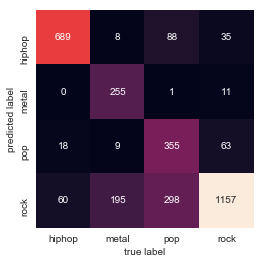

In [345]:
#Metricas de desempeño del modelo

display(print(classification_report(y_test, y_hat)))
generos=['hiphop','metal','pop','rock']
mat = confusion_matrix(y_test, y_hat)
sns.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=generos, 
    yticklabels=generos
)
plt.xlabel('true label')
plt.ylabel('predicted label') 

In [346]:
# Predicción de letras nuevas
letras_val=['I got a place in the underworld', 
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', 
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", 
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', 
'Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates', 
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving" 
]
pipeline_model.predict(letras_val)

array(['rock', 'metal', 'rock', 'hiphop', 'metal', 'rock'], dtype='<U6')

In [ ]:
# Clasificación real de las letras (rock,metal,pop,hiphop,rock,pop)

- Este modelo genera un preprocesamiento de los tokens un poco más sofisticado que la clase CountVectorizer, ya que integra otros parametros, en general se puede apreciar que mejoran bastente la precisión de todos los generos a excepción del rock que disminuye, la sensibilidad se conserva, pero las métricas informan que este modelo tiene un desempeño global mayor en precisión 0,82 que el resto de los modelos, pero su sensibilidad es menor que el anterior, por lo tanto F1 se compensa.



- El modelo acertó 3 de 6 letras, es decir el 50 %, tuvo problemas para predecir el pop y el hip-hop en las letras entregadas.